In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import neo
from pathlib import Path

In [2]:
data_dir = Path(r'R:\home\firefly_link\468_patch_clamp')
files = Path(data_dir).glob("./**/*.smr")
smr_names = [str(f) for f in files]
dates = []
slips = []
cells = []
trial_string = []
df = pd.DataFrame()
df['SMR_file'] = smr_names

for data in df.itertuples():
    s = data.SMR_file

    par = Path(s).parts

    dates.append(int(par[par.index("468_patch_clamp") + 1][-8:]))
    
    slips.append(s[s.find("slip") + len("slip") : s.find("slip") + len("slip") + 1])

    cells.append(s[s.find("cell") + len("cell") : s.find("cell") + len("cell") + 1])
   
    trial_string.append("_".join(Path(s).parts[Path(s).parts.index("468_patch_clamp") : -1]))
df["date"] = dates
df["slip"] = slips
df["cell"] = cells
df["trial_string"] = trial_string
df = df[df['date']>20231005]
df

,SMR_file,date,slip,cell,trial_string
38,R:\home\firefly_link\468_patch_clamp\20231024\...,20231024,1,1,468_patch_clamp_20231024_slip1_cell1
39,R:\home\firefly_link\468_patch_clamp\20231024\...,20231024,1,1,468_patch_clamp_20231024_slip1_cell1
40,R:\home\firefly_link\468_patch_clamp\20231024\...,20231024,2,1,468_patch_clamp_20231024_slip2_cell1
41,R:\home\firefly_link\468_patch_clamp\20231024\...,20231024,3,1,468_patch_clamp_20231024_slip3_cell1
42,R:\home\firefly_link\468_patch_clamp\20231024\...,20231024,4,1,468_patch_clamp_20231024_slip4_cell1
43,R:\home\firefly_link\468_patch_clamp\20231025\...,20231025,1,1,468_patch_clamp_20231025_slip1_cell1
44,R:\home\firefly_link\468_patch_clamp\20231025\...,20231025,2,1,468_patch_clamp_20231025_slip2_cell1
45,R:\home\firefly_link\468_patch_clamp\20231025\...,20231025,2,2,468_patch_clamp_20231025_slip2_cell2
46,R:\home\firefly_link\468_patch_clamp\20231025\...,20231025,3,1,468_patch_clamp_20231025_slip3_cell1
47,R:\home\firefly_link\468_patch_clamp\20231031\...,20231031,1,1,468_patch_clamp_20231031_slip1_cell1


In [3]:
#fluctuating ones: 45/40

In [4]:
reader = neo.io.Spike2IO(filename=df.SMR_file[40],try_signal_grouping=False)
# read the block
bl = reader.read(lazy=False)[0]
#bl

In [5]:
index = 40
save_dir = Path(r'R:\home\firefly_link\468_patch_clamp\results_profiles')
data_dir = Path(save_dir,'_'.join(df.trial_string[index].split('_')[-3:]) )
data_dir

WindowsPath('R:/home/firefly_link/468_patch_clamp/results_profiles/20231024_slip2_cell1')

In [6]:
asig_t = bl.segments[0].analogsignals[0]
# Extract sample times
#times = asig_t.times.rescale('s').magnitude
# Determine channel name, without leading b' 
asig = asig_t
ch = asig.name
V_cc = {}
I_cc = {}
# Extract sampling frequency
fs = float(asig.sampling_rate)
# Assign sampling times, sampling frequency and data to correct dictionary
for asig in bl.segments[0].analogsignals:
    ch = asig.name
    times = asig.times.rescale('s').magnitude
    if ch == 'V_vc':
        
        V_cc['times'] = times
        V_cc['signal'] = np.array(asig)
        #V_cc['fs'] = fs
    elif ch == 'I_vc':
        
        I_cc['times'] = times
        I_cc['signal'] = np.array(asig)
        #I_cc['fs'] = fs

In [7]:
V = np.squeeze(V_cc['signal'])
I = np.squeeze(I_cc['signal'])

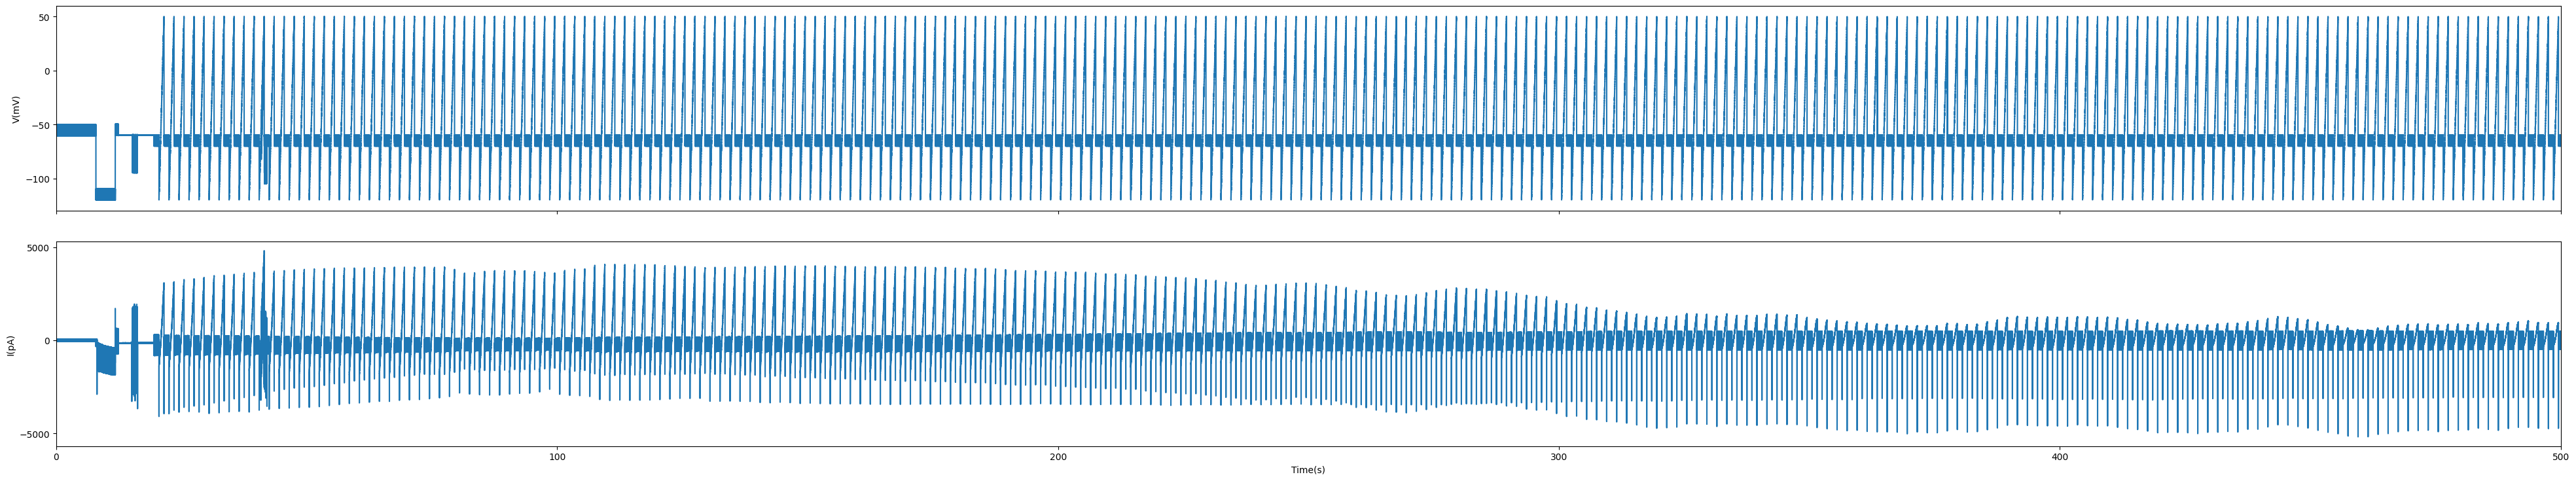

In [7]:
fig, axs = plt.subplots(2, 1, sharex=True, figsize = (40,8))
t = 500
axs[0].plot(times[np.where(times<t)], V_cc['signal'][np.where(times<t)])
axs[0].set_ylim(-130,60)
axs[0].set_ylabel('V(mV)')
#axs[0].set_xlim(times.min(), times.max())
axs[0].set_xlim(0,t)
axs[1].plot(times[np.where(times<t)], I_cc['signal'][np.where(times<t)])
axs[1].set_ylabel('I(pA)')
axs[1].set_xlabel('Time(s)')
SMALL_SIZE = 28
MEDIUM_SIZE = 30
BIGGER_SIZE = 32

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
#plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
#plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

fig.tight_layout()
plt.show()

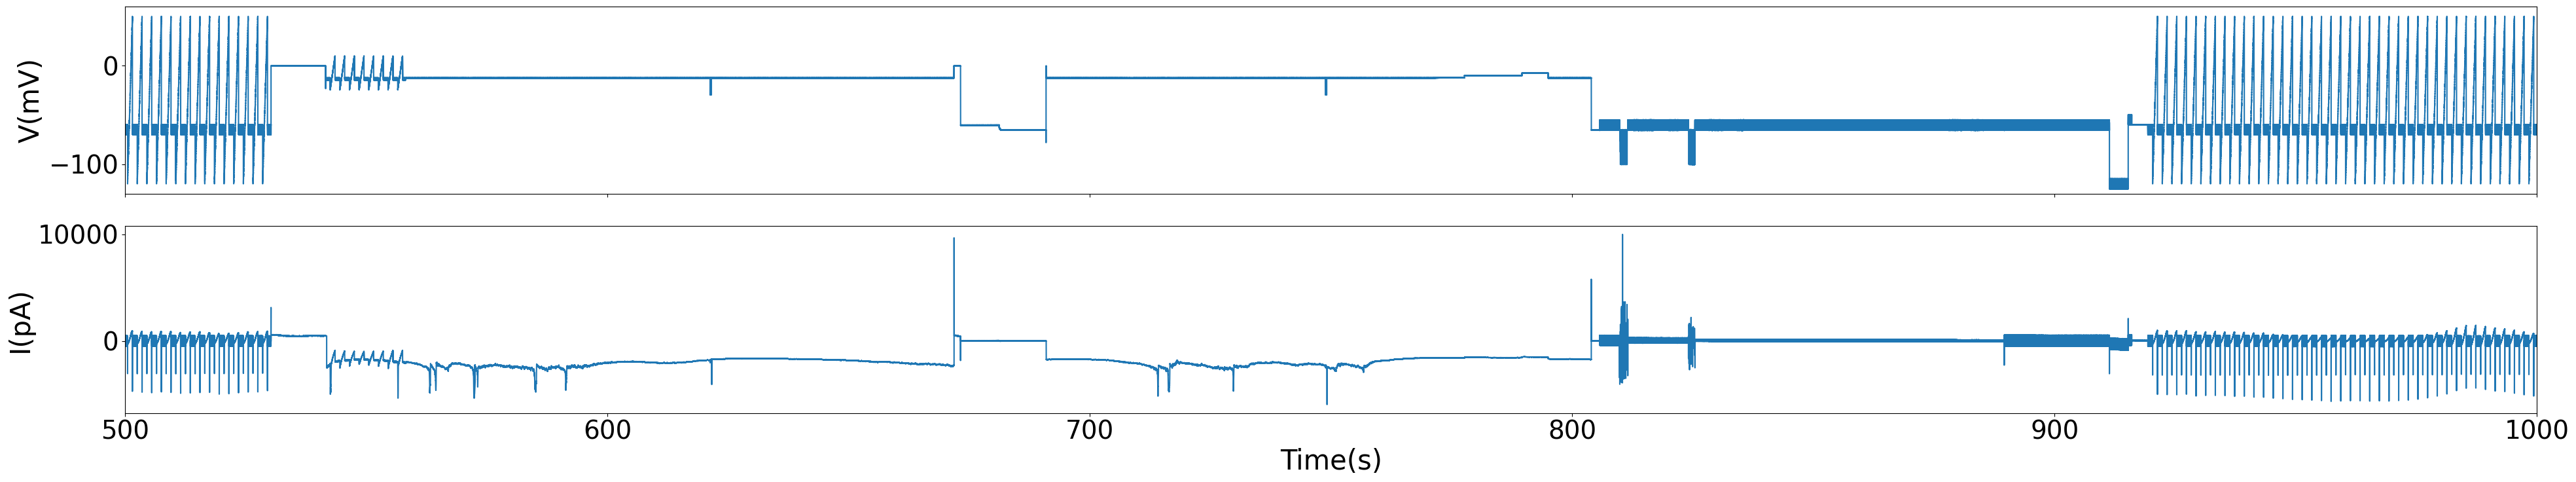

In [8]:
#%matplotlib auto
fig, axs = plt.subplots(2, 1, sharex=True, figsize = (40,8))
t_min = 500
t_max = 1000

axs[0].plot(times[(times>=t_min)&(times<t_max)], V_cc['signal'][(times>=t_min)&(times<t_max)])
axs[0].set_ylim(-130,60)
axs[0].set_ylabel('V(mV)')
#axs[0].set_xlim(times.min(), times.max())
axs[0].set_xlim(t_min,t_max)
axs[1].plot(times[(times>=t_min)&(times<t_max)], I_cc['signal'][(times>=t_min)&(times<t_max)])

axs[1].set_ylabel('I(pA)')
axs[1].set_xlabel('Time(s)')

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
#plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

fig.tight_layout()
plt.show()

In [8]:
t_b_initial = times[(V<-120)&(times>42.21)][0]
t_b = np.arange(t_b_initial,528.05,2)
Vs_b = []
Is_b = []

for t in t_b:
    V = np.squeeze(V_cc['signal'])
    I = np.squeeze(I_cc['signal'])
    Vs_b.append(V[(times>=t)&(times<t+0.999)])
    Is_b.append(I[(times>=t)&(times<t+0.999)])
    
#print(Vs_b, Is_b)

In [9]:
len(Is_b)

223

<IPython.core.display.Javascript object>


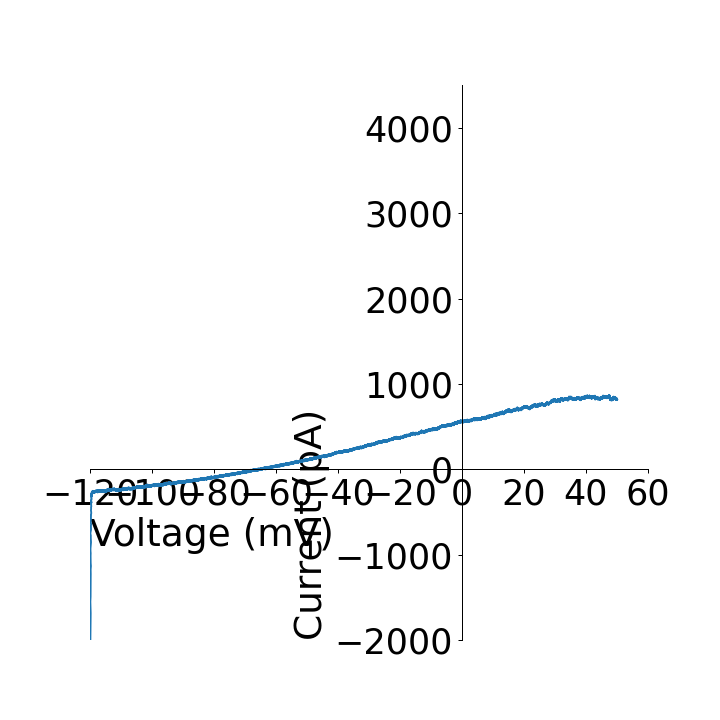

In [39]:
%matplotlib notebook 
from IPython import display
from matplotlib.animation import FuncAnimation
fig, ax = plt.subplots(figsize = (8,8))
line, = ax.plot(Vs_b[0],Is_b[0])
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')

# remove the ticks from the top and right edges
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.xlabel('Voltage (mV)',loc = 'left')
plt.ylabel('Current (pA)',loc = 'bottom')
plt.ylim([-2000,4500])
plt.xlim([-120,60])
plt.rc('font', size=14)          # controls default text sizes
plt.rc('axes', titlesize=14)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14)    # fontsize of the tick labels

def init():
    line.set_ydata([np.nan] * len(Is_b))

def animate(i):
    line.set_ydata(Is_b[i])  # update the data

ani = FuncAnimation(fig, animate, init_func=init, interval=50, repeat = False, frames = len(Is_b), save_count = len(Is_b))
#ani.save('Desktop/20231024_slip2_cell1_breaking_in.mp4')
plt.show()

In [10]:
t_initial = times[(V<-120)&(times>920)][0]

t_last = 1864
t_initials = np.arange(t_initial,t_last,2)

Vs = []
Is = []
for t in t_initials:
    V = np.squeeze(V_cc['signal'])
    I = np.squeeze(I_cc['signal'])
    Vs.append(V[(times>=t)&(times<t+0.999)])
    Is.append(I[(times>=t)&(times<t+0.999)])

In [11]:
len(Is)

442

<IPython.core.display.Javascript object>


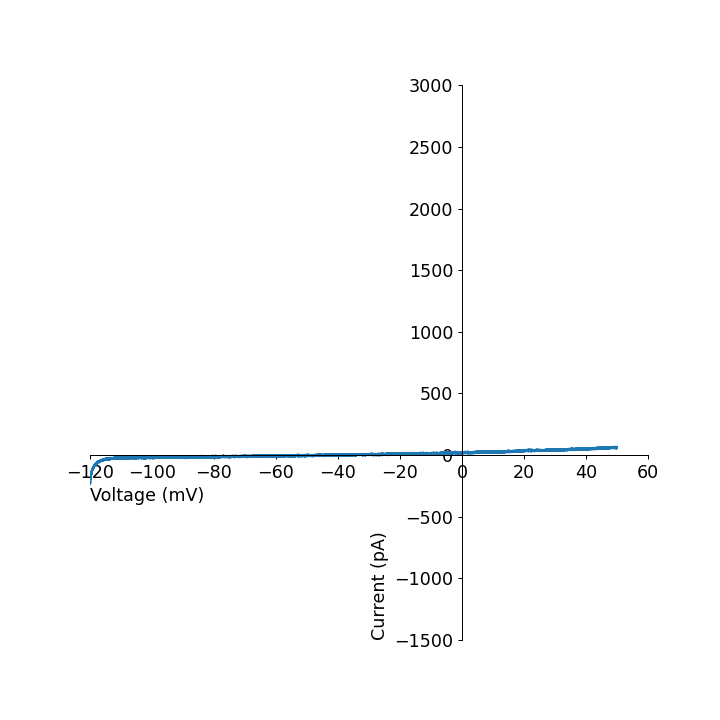

In [42]:
fig, ax = plt.subplots(figsize = (8,8))
line, = ax.plot(Vs[0],Is[0])
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')

# remove the ticks from the top and right edges
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.xlabel('Voltage (mV)',loc = 'left')
plt.ylabel('Current (pA)',loc = 'bottom')
plt.ylim([-1500,3000])
plt.xlim([-120,60])
plt.rc('font', size=14)          # controls default text sizes
plt.rc('axes', titlesize=14)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14)    # fontsize of the tick labels

def init():
    line.set_ydata([np.nan] * len(Is))

def animate(i):
    line.set_ydata(Is[i])  # update the data
ani = FuncAnimation(fig, animate, init_func=init, interval=50, repeat = False, frames = len(Is), save_count = len(Is))
#ani.save(r'C:\Users\Firefly\Desktop\patch clamp results\20231024_slip2_cell1_later.mp4')
plt.show()

In [12]:
Iss = Is_b+Is
Vss = Vs_b+Vs

In [14]:
from pathlib import Path

t_all = list(t_b) + list(t_initials)
np.save(r'R:\home\firefly_link\468_patch_clamp\results_profiles\20231024_slip2_cell1\t_ramp.npy',t_all)

223


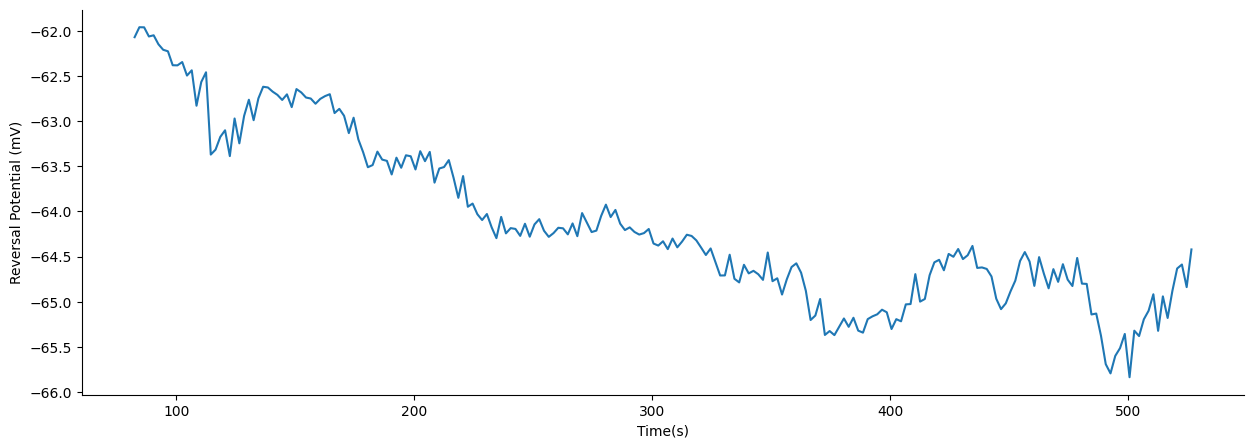

In [15]:
from sklearn import  linear_model
#using linear regression for each ramp to find the y-intercept
V_rev = []
a = 5 #this is the linear fitting threshold
Vss = Vs_b
Iss = Is_b
for i in range(len(Vss)):
    x = Iss[i][np.where((Iss[i] >= -a) & (Iss[i] <=a))].reshape(1, -1)
    y = Vss[i][np.where((Is[i] >= -a) & (Iss[i] <=a))].reshape(1, -1)
    reg = linear_model.LinearRegression()
    reg.fit(x, y)
    V_rev.append(reg.intercept_.mean())
    
#t = np.arange(0,len(V_rev)*2,2)
#t = np.concatenate([t_b, t_initials])
t = t_b
print(len(V_rev))
fig, ax = plt.subplots(figsize = (15,5))
ax.plot(t,V_rev)
#ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
#ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
plt.xlabel('Time(s)')
plt.ylabel('Reversal Potential (mV)')
plt.show()

442


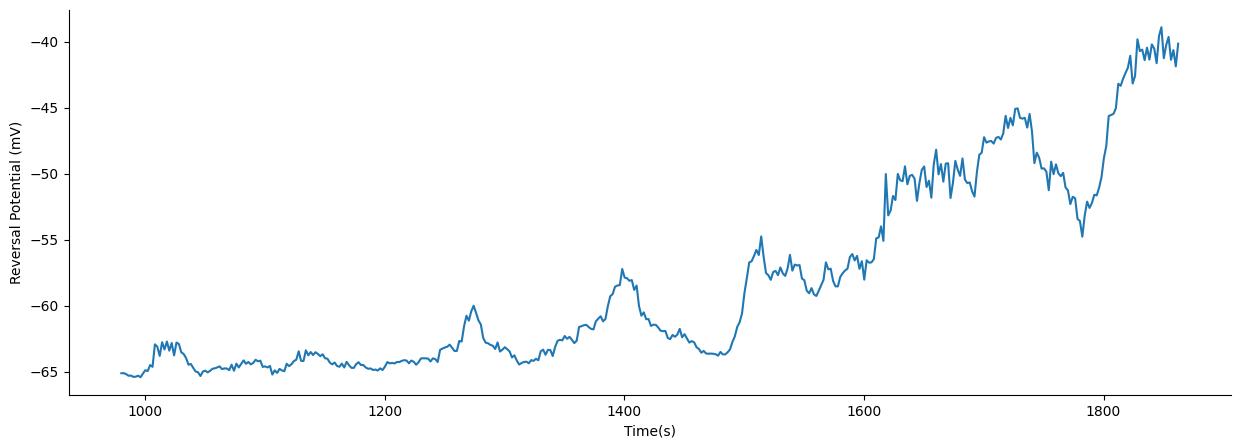

In [16]:
from sklearn import  linear_model
#using linear regression for each ramp to find the y-intercept
V_rev_2 = []
a = 5 #this is the linear fitting threshold
Vss = Vs
Iss = Is
for i in range(len(Vss)):
    x = Iss[i][np.where((Iss[i] >= -a) & (Iss[i] <=a))].reshape(1, -1)
    y = Vss[i][np.where((Is[i] >= -a) & (Iss[i] <=a))].reshape(1, -1)
    reg = linear_model.LinearRegression()
    reg.fit(x, y)
    V_rev_2.append(reg.intercept_.mean())
    
#t = np.arange(0,len(V_rev)*2,2)
#t = np.concatenate([t_b, t_initials])
t = t_initials
print(len(V_rev_2))
fig, ax = plt.subplots(figsize = (15,5))
ax.plot(t,V_rev_2)
#ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
#ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
plt.xlabel('Time(s)')
plt.ylabel('Reversal Potential (mV)')
plt.show()

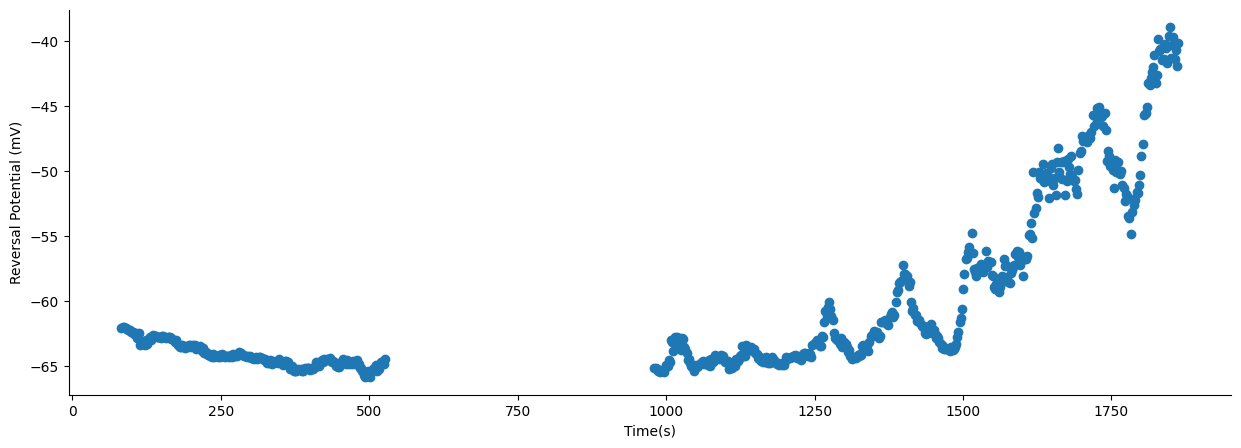

In [17]:
V_rev_all = V_rev + V_rev_2
t_b = list(t_b)
t_initials = list(t_initials)
t_all = t_b + t_initials
fig, ax = plt.subplots(figsize = (15,5))
ax.scatter(t_all,V_rev_all)
#ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
#ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
plt.xlabel('Time(s)')
plt.ylabel('Reversal Potential (mV)')
plt.show()

In [18]:
np.save(r'R:\home\firefly_link\468_patch_clamp\results_profiles\20231024_slip2_cell1\V_rev.npy',V_rev_all)

In [13]:
from scipy import optimize
import math
def model_func(t, A, K, C):
    return A * np.exp(K * t) + C
def fit_exp_nonlinear(t, y):
    opt_parms, parm_cov = optimize.curve_fit(model_func, t, y, p0=[1,-0.5, 1],maxfev = 2000)
    A, K, C = opt_parms
    return A, K, C
def integrate(x, y):
    area = np.trapz(y=y, x=x)
    return area

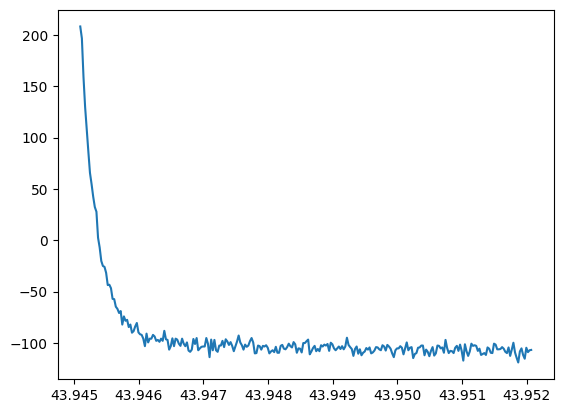

In [14]:
t_seal_b = []
for t in np.arange(43.81,528.05,2):
    t_min = t+0.1
    t_max = t+0.15
    t_range = times[(times>=t_min)&(times<t_max)]
    I_range = I[(times>=t_min)&(times<t_max)]
    t_max = t_range[I_range.argmax()]
    t_seal_b.append(t_max)
    #print(I_range.max())

#%matplotlib notebook 
#t_upper_initial = 920.2156

#t_seal = np.arange(t_upper_initial,922,2)

t = times[(times>=t_seal_b[0])&(times<t_seal_b[0]+0.007)]
ttest = t - t[0]
I_exp = I[(times>=t_seal_b[0])&(times<t_seal_b[0]+0.007)]
plt.plot(t,I_exp)
plt.show()

<IPython.core.display.Javascript object>


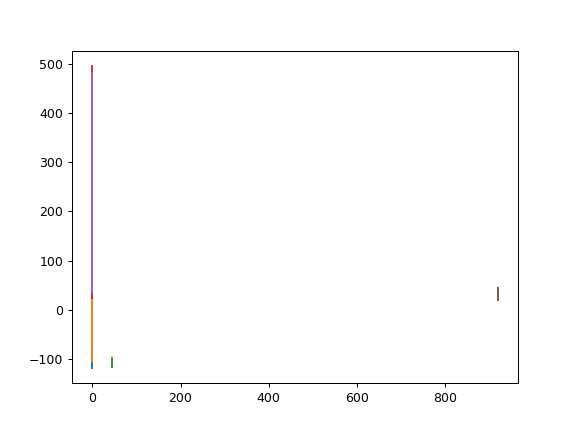

In [15]:
%matplotlib notebook
# Non-linear Fit
A, K, C = fit_exp_nonlinear(ttest, I_exp)
fit_y = model_func(ttest, A, K, C)

plt.plot(ttest, I_exp)
plt.plot(ttest, fit_y)
plt.show()

In [16]:
#t_upper_initial = 920.2156
#t_lower_initial = t_upper_initial + 0.01
#t_seal = np.arange(t_upper_initial,922,2)
t = times[(times>=t_seal_b[0]+0.007)&(times<t_seal_b[0]+0.009)]
ttest = t - t[0]
I_exp = I[(times>=t_seal_b[0]+0.007)&(times<t_seal_b[0]+0.009)]
plt.plot(t,I_exp)
plt.show()

In [17]:
#compute access resistance over time
from sklearn.metrics import r2_score
#calculate acceptance resistance during breaking in
#t_seal_initial = times[(V<-10)&(times>32.86)][0]
#t_upper_initial = 33.05881
#t_upper_initial = 42.1327
#t_lower_initial = t_upper_initial + 0.01 528.15
#t_seal_b = np.arange(t_upper_initial,528.05,2)

Vs_seal_upper = []
Is_seal_upper = []

Vs_seal_lower = []
Is_seal_lower = []

I_exp = []

#I_ss = []
Ra_b = []
Cm_b = []
R_b = []
r2_b = []
for t in t_seal_b:
    V = np.squeeze(V_cc['signal'])
    I = np.squeeze(I_cc['signal'])
    
    V_u = V[(times>=t+0.007)&(times<t+0.009)].mean()
    I_u = I[(times>=t+0.007)&(times<t+0.009)].mean()

    
    Vs_seal_upper.append(V_u)
    Is_seal_upper.append(I_u)
    
    V_l = V[(times>=t+0.017)&(times<t+0.019)].mean()
    I_l = I[(times>=t+0.017)&(times<t+0.019)].mean()
    
    Vs_seal_lower.append(V_l)
    Is_seal_lower.append(I_l)
    
    #I_ss.append((I_u + I_l)/2)
    
    I_exp = I[(times>=t)&(times<t+0.007)]

    t_u = times[(times>=t)&(times<t+0.007)]
    ttest = t_u - t_u[0]
    
    if (V_u - V_l >11):
        print('Warning', t,(V_u-V_l))
    
    # Non-linear Fit
    A, K, C = fit_exp_nonlinear(ttest, I_exp)
    fit_y = model_func(ttest, A, K, C)
    r2_b.append(r2_score(I_exp, fit_y))
    #print(I_exp,fit_y)
    if any(m<0 for m in fit_y):
        integrate_part = fit_y + np.abs(fit_y.min())
        #if any(n < 0 for n in integrate_part):
            #print('Warning - still have netative values here')
    else:
        integrate_part = fit_y - fit_y.min()
    q1 = integrate(ttest, integrate_part)
    q1 = q1*1e-12
    tau = 1/-K #tau is in seconds
    q2 = (I_u - I_l)*1e-12 * tau #tau is in 1/seconds, deltaI is in amps
    cm = (q1+q2)/(V_u - V_l)
    cm = cm/1e-3 #cm is now in farad
    Cm_b.append(cm*1e12)#now cm is in pF
    Rt = (V_u - V_l)*1e-3*1e12/(I_u - I_l)# now Rt is in ohms
    R_b.append(Rt*1e-6)
    #Ra2 - Ra * Rt + Rt * (Tau/Cm) = 0
    a = 1
    b = -Rt 
    c = Rt*(tau/(cm)) 

    dis = b * b - 4 * a * c 
    sqrt_val = math.sqrt(abs(dis))
    Ra1 = (-b+sqrt_val)/2*a
    Ra2 = (-b-sqrt_val)/2*a
    Ra_b.append(Ra1/1e6)

<IPython.core.display.Javascript object>


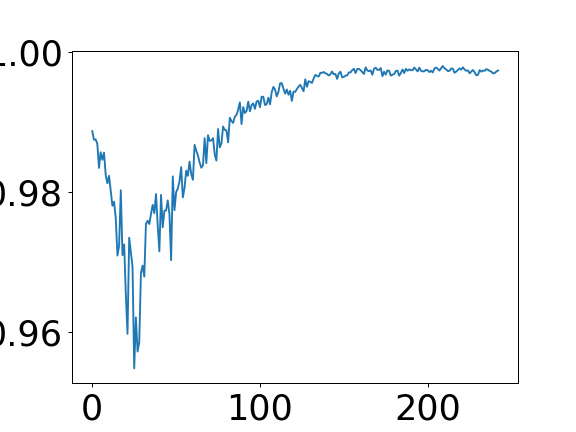

In [25]:
plt.plot(r2_b)

<IPython.core.display.Javascript object>


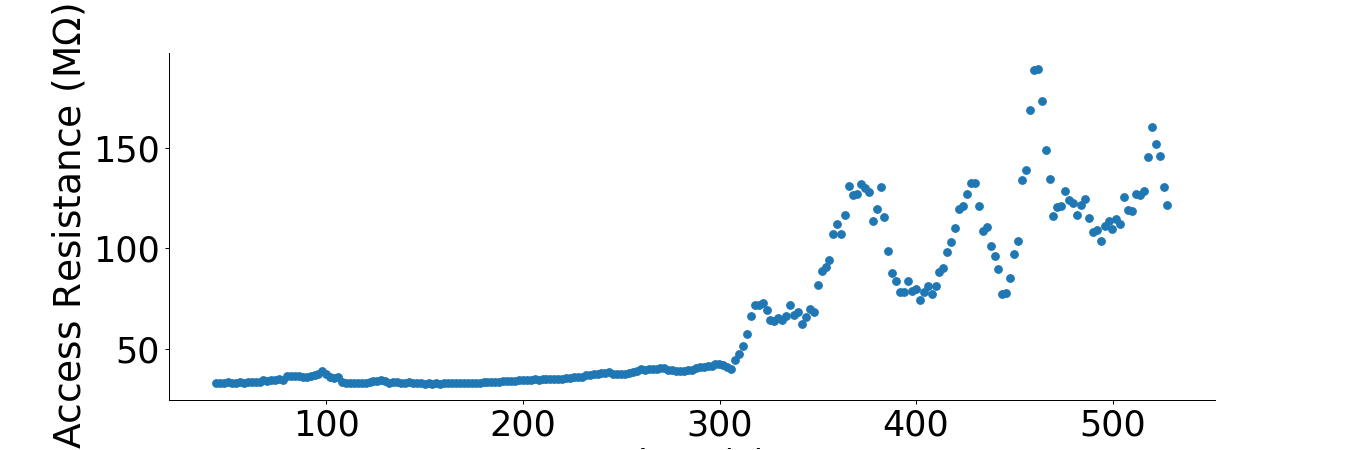

In [26]:
r_accept = Ra_b
fig, ax = plt.subplots(figsize = (15,5))
ax.scatter(t_seal_b,r_accept)
#ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
#ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
#plt.ylim([-200,200])
# remove the ticks from the top and right edges
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.xlabel('Time (s)')
plt.ylabel('Access Resistance (M$\Omega$)')
plt.show()

<IPython.core.display.Javascript object>


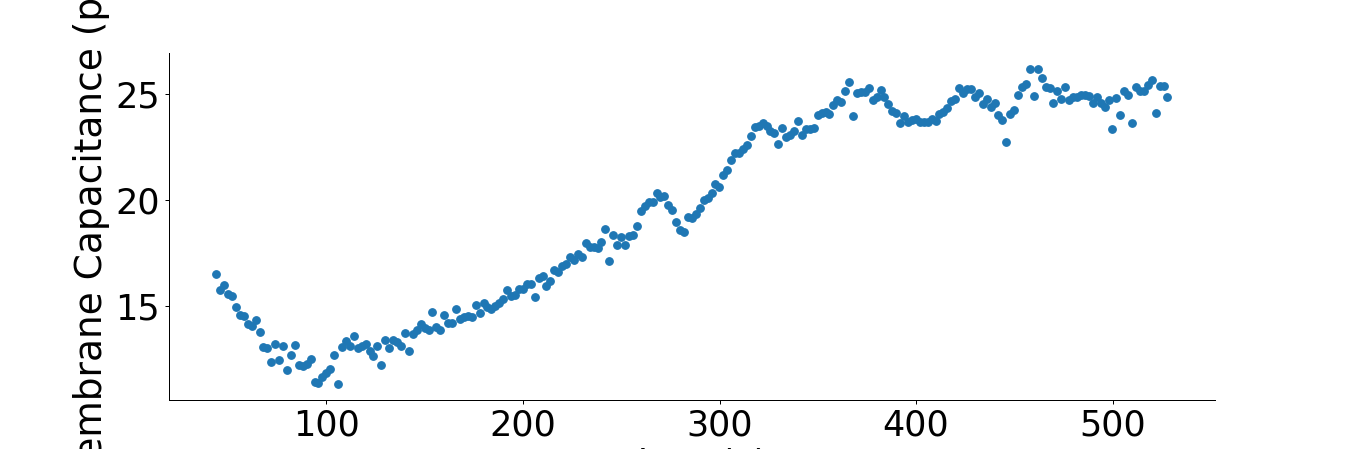

In [31]:
r_accept= Cm_b
fig, ax = plt.subplots(figsize = (15,5))
ax.scatter(t_seal_b,r_accept)
#ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
#ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
#plt.ylim([-200,200])
# remove the ticks from the top and right edges
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.xlabel('Time (s)')
plt.ylabel('Membrane Capacitance (pF)')
plt.show()

In [18]:
t_seal_f = []
for t in np.arange(919.5,925,2):
    t_min = t+0.1
    t_max = t+0.15
    t_range = times[(times>=t_min)&(times<t_max)]
    I_range = I[(times>=t_min)&(times<t_max)]
    t_max = t_range[I_range.argmax()]
    t_seal_f.append(t_max)
    #print(I_range.max())

In [19]:
#%matplotlib notebook 
#t_upper_initial = 920.2156

#t_seal = np.arange(t_upper_initial,922,2)
index = 0
t = times[(times>=t_seal_f[index])&(times<t_seal_f[index]+0.007)]
ttest = t - t[0]
I_exp = I[(times>=t_seal_f[index])&(times<t_seal_f[index]+0.007)]
#plt.plot(t,I_exp)
#plt.show()


A, K, C = fit_exp_nonlinear(ttest, I_exp)
fit_y = model_func(ttest, A, K, C)

plt.plot(ttest, I_exp)
plt.plot(ttest, fit_y)
plt.show()

In [20]:
#t_upper_initial = 920.2156
#t_lower_initial = t_upper_initial + 0.01
#t_seal = np.arange(t_upper_initial,922,2)
index = 0
t = times[(times>=t_seal_f[index]+0.007)&(times<t_seal_f[index]+0.009)]
ttest = t - t[0]
I_exp = I[(times>=t_seal_f[index]+0.007)&(times<t_seal_f[index]+0.009)]
plt.plot(t,I_exp)
plt.show()

In [21]:

t_seal_f = []
for t in np.arange(919.5,1864,2):
    t_min = t+0.1
    t_max = t+0.15
    t_range = times[(times>=t_min)&(times<t_max)]
    I_range = I[(times>=t_min)&(times<t_max)]
    t_max = t_range[I_range.argmax()]
    t_seal_f.append(t_max)

Vs_seal_upper = []
Is_seal_upper = []

Vs_seal_lower = []
Is_seal_lower = []

I_exp = []

#I_ss = []
Ra_f = []
Cm_f = []
R_f = []
r2_f = []
for t in t_seal_f:
    V = np.squeeze(V_cc['signal'])
    I = np.squeeze(I_cc['signal'])
    
    V_u = V[(times>=t+0.007)&(times<t+0.009)].mean()
    I_u = I[(times>=t+0.007)&(times<t+0.009)].mean()

    
    Vs_seal_upper.append(V_u)
    Is_seal_upper.append(I_u)
    
    V_l = V[(times>=t+0.017)&(times<t+0.019)].mean()
    I_l = I[(times>=t+0.017)&(times<t+0.019)].mean()
    
    Vs_seal_lower.append(V_l)
    Is_seal_lower.append(I_l)
    
    #I_ss.append((I_u + I_l)/2)
    
    I_exp = I[(times>=t)&(times<t+0.007)]

    t_u = times[(times>=t)&(times<t+0.007)]
    ttest = t_u - t_u[0]
    
    # Non-linear Fit
    A, K, C = fit_exp_nonlinear(ttest, I_exp)
    fit_y = model_func(ttest, A, K, C)
    r2_f.append(r2_score(I_exp, fit_y))
    #print(I_exp,fit_y)
    if any(m<0 for m in fit_y):
        integrate_part = fit_y + np.abs(fit_y.min())
        #if any(n < 0 for n in integrate_part):
            #print('Warning - still have netative values here')
    else:
        integrate_part = fit_y - fit_y.min()
    q1 = integrate(ttest, integrate_part)
    q1 = q1*1e-12
    tau = 1/-K #tau is in seconds
    q2 = (I_u - I_l)*1e-12 * tau #tau is in 1/seconds, deltaI is in amps
    cm = (q1+q2)/(V_u - V_l)
    cm = cm/1e-3 #cm is now in farad
    Cm_f.append(cm*1e12)#now cm is in pF
    Rt = (V_u - V_l)*1e-3*1e12/(I_u - I_l)# now Rt is in ohms
    R_f.append(Rt*1e-6)
    #Ra2 - Ra * Rt + Rt * (Tau/Cm) = 0
    a = 1
    b = -Rt 
    c = Rt*(tau/(cm)) 

    dis = b * b - 4 * a * c 
    sqrt_val = math.sqrt(abs(dis))
    Ra1 = (-b+sqrt_val)/2*a
    Ra2 = (-b-sqrt_val)/2*a
    Ra_f.append(Ra1/1e6)

<IPython.core.display.Javascript object>


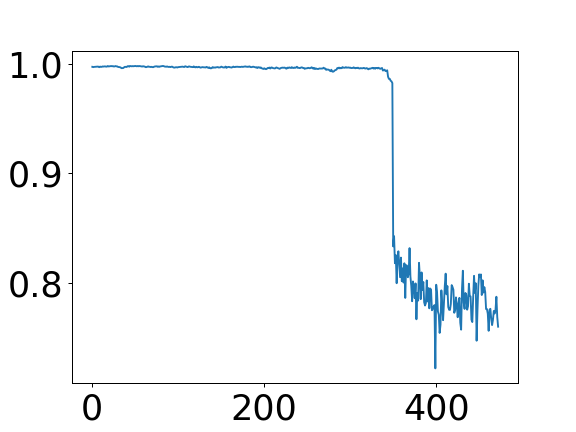

In [37]:
plt.plot(r2_f)

In [48]:
print(np.array(Ra_f)[np.array(Ra_f)>500])
print(np.array(t_seal_f)[np.array(Ra_f)>500])
print(np.array(R_f)[np.array(Ra_f)>500])

[527.95840721 620.79691247 578.75520363 583.25854814 623.69324733
 687.79849445 776.45382349 705.87843384 623.25578268 577.91360063
 643.22628414 609.22221458 666.87731149 622.44926404 593.71597502
 914.08896069 578.02126631 779.40833963 617.3825951  543.57760427
 537.61141669 512.97572799 641.10886738 554.79600168 704.65999847
 633.09394564 657.49065509 553.92753781 635.71567124 602.00266542
 696.40866051 514.76401927 521.4107324  599.25300917 573.93674215
 683.89826914 719.08714023 673.12054177 613.2524649  672.81384347
 661.79467709 573.52051986 626.48655431 569.32411723 572.05309417
 503.6201489  527.26193438 547.0148412  509.08387132 547.0975482
 511.00852249 542.76366    500.39143118 547.58512278 532.9516582
 665.971427   507.27491078 613.70418128 631.48706887 586.81533
 515.61142892 533.42010964]
[ 959.647995  961.607995  963.627995  965.647995 1011.627995 1013.647995
 1015.607995 1017.627995 1019.607995 1021.607995 1023.627995 1025.647995
 1027.647995 1267.647995 1269.607995 12

<IPython.core.display.Javascript object>


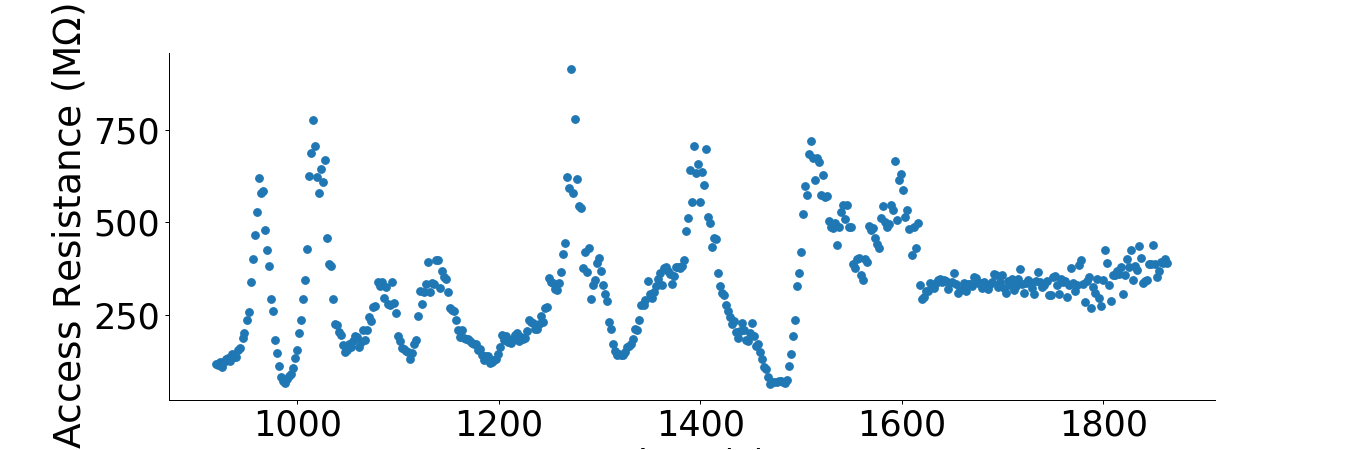

In [38]:
r_accept = Ra_f
fig, ax = plt.subplots(figsize = (15,5))
ax.scatter(t_seal_f,r_accept)
#ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
#ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
#plt.ylim([-200,200])
# remove the ticks from the top and right edges
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.xlabel('Time (s)')
plt.ylabel('Access Resistance (M$\Omega$)')
plt.show()

<IPython.core.display.Javascript object>


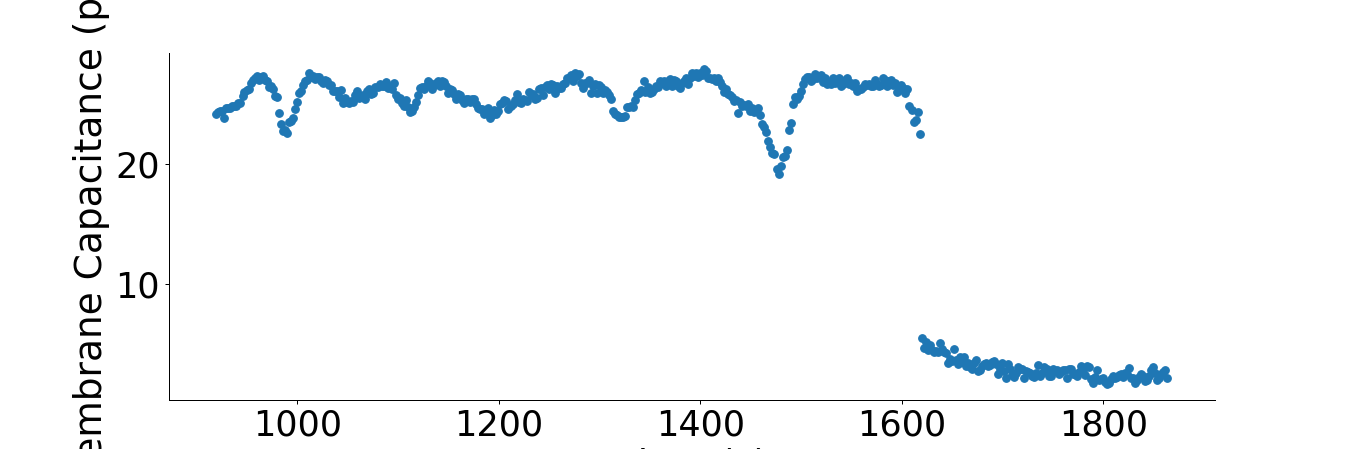

In [39]:
r_accept= Cm_f
fig, ax = plt.subplots(figsize = (15,5))
ax.scatter(t_seal_f,r_accept)
#ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
#ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
#plt.ylim([-200,200])
# remove the ticks from the top and right edges
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.xlabel('Time (s)')
plt.ylabel('Membrane Capacitance (pF)')
plt.show()

<IPython.core.display.Javascript object>


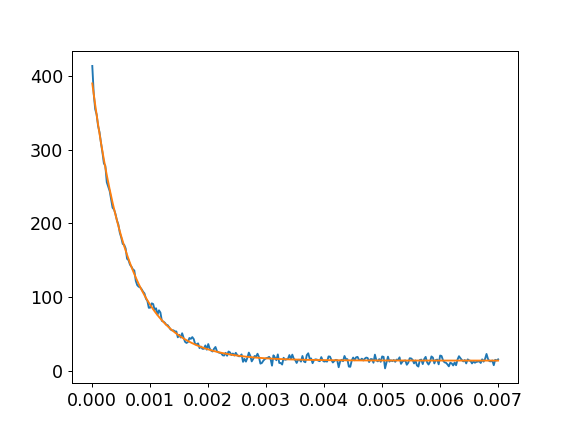

In [192]:
%matplotlib notebook 
#t_upper_initial = 920.2156

#t_seal = np.arange(t_upper_initial,922,2)

t = times[(times>=t_seal_f[100])&(times<t_seal_f[100]+0.007)]
ttest = t - t[0]
I_exp = I[(times>=t_seal_f[100])&(times<t_seal_f[100]+0.007)]
#plt.plot(t,I_exp)
#plt.show()


A, K, C = fit_exp_nonlinear(ttest, I_exp)
fit_y = model_func(ttest, A, K, C)

plt.plot(ttest, I_exp)
plt.plot(ttest, fit_y)
plt.show()

<IPython.core.display.Javascript object>


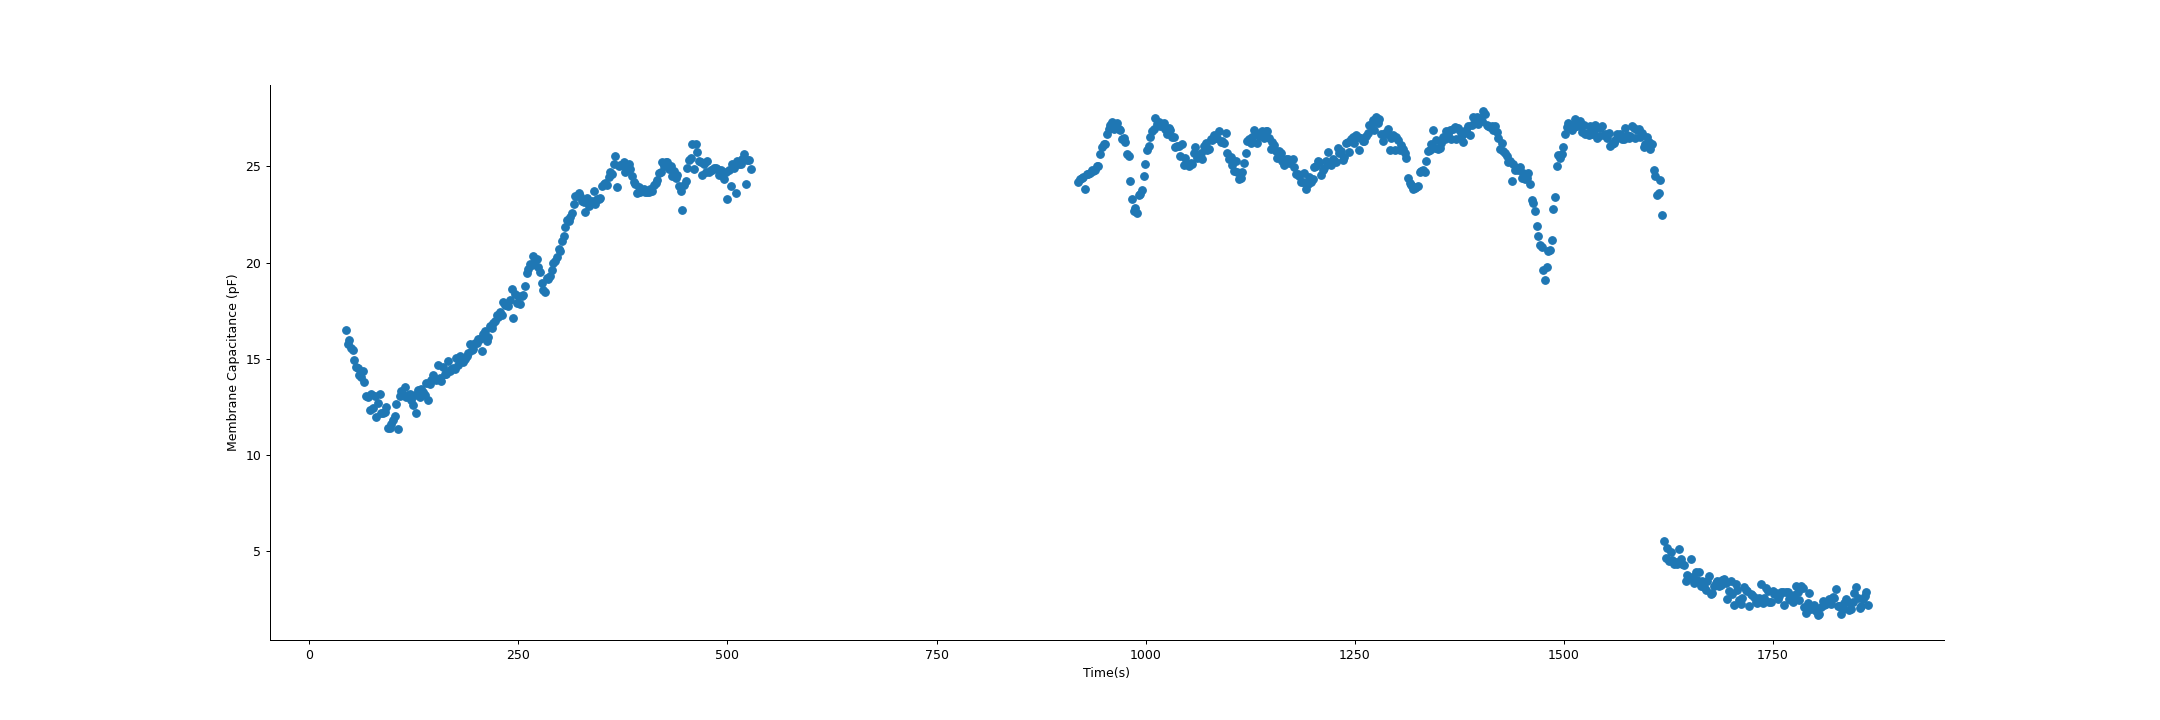

In [25]:
%matplotlib notebook 
Cm_all = Cm_b+Cm_f

t_all = t_seal_b + t_seal_f
fig, ax = plt.subplots(figsize = (24,8))
ax.scatter(t_all,Cm_all)
#ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
#ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
plt.xlabel('Time(s)')
plt.ylabel('Membrane Capacitance (pF)')
plt.show()

<IPython.core.display.Javascript object>


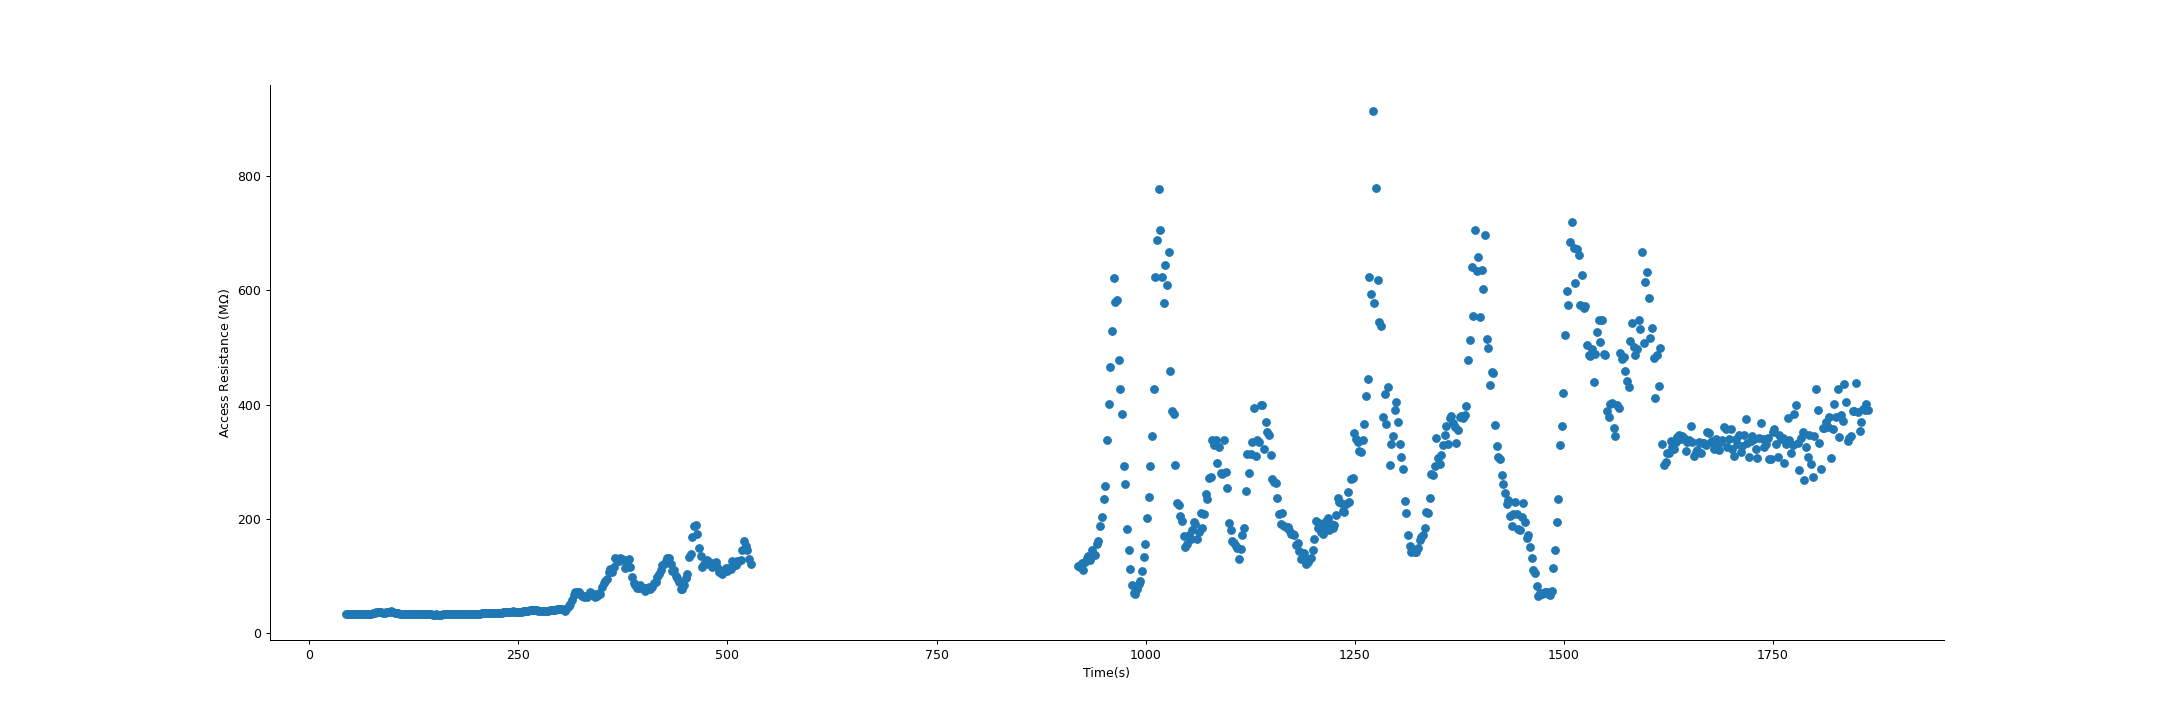

In [23]:
%matplotlib notebook 
Ra_all = Ra_b+Ra_f

t_all = t_seal_b + t_seal_f
fig, ax = plt.subplots(figsize = (24,8))
ax.scatter(t_all,Ra_all)
#ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
#ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
plt.xlabel('Time(s)')
plt.ylabel('Access Resistance (M$\Omega$)')
plt.show()

In [26]:
np.save(Path(data_dir,'Ra.npy'),Ra_all)
np.save(Path(data_dir,'Cm.npy'),Cm_all)
#np.save(Path(data_dir,'Conductance.npy'),g)

In [27]:
g = []
for i in range(len(Iss)):
    
    g.append((Iss[i][-1]-Iss[i][0])/(Vss[i][-1]-Vss[i][0]))
np.save(Path(data_dir,'Conductance.npy'),g)

In [30]:
Vs_save = np.vstack(Vss)
Is_save = np.vstack(Iss)
np.save(Path(data_dir,'Vs_ramp.npy'),Vs_save)
np.save(Path(data_dir,'Is_ramp.npy'),Is_save)